<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#MNIST-Classification-unsing-CNN" data-toc-modified-id="MNIST-Classification-unsing-CNN-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>MNIST Classification unsing CNN</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Split-the-Data" data-toc-modified-id="Split-the-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Split the Data</a></span></li><li><span><a href="#Preview-the-Data" data-toc-modified-id="Preview-the-Data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Preview the Data</a></span></li><li><span><a href="#Process-the-Data" data-toc-modified-id="Process-the-Data-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Process the Data</a></span></li></ul></li><li><span><a href="#Create-CNN-Model" data-toc-modified-id="Create-CNN-Model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Create CNN Model</a></span><ul class="toc-item"><li><span><a href="#Fit-the-model" data-toc-modified-id="Fit-the-model-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Fit the model</a></span></li></ul></li><li><span><a href="#Test-the-Results" data-toc-modified-id="Test-the-Results-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Test the Results</a></span><ul class="toc-item"><li><span><a href="#Success!" data-toc-modified-id="Success!-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Success!</a></span></li></ul></li></ul></div>

## MNIST Classification unsing CNN

### Imports

In [2]:
import tensorflow.keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt
import numpy as np

### Split the Data

In [3]:
#MNIST has a standard train and test split so no need to split on our own
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('Shape of X_train: {}'.format(X_train.shape))
print('Shape of y_train: {}'.format(y_train.shape))
print()
print('Shape of X_test: {}'.format(X_test.shape))
print('Shape of y_test: {}'.format(y_test.shape))

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


### Preview the Data

MNIST Image #116: Labeled as 9


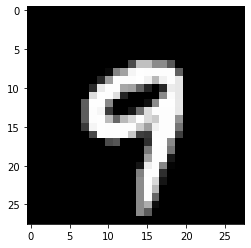

In [4]:
#Display an image from the dataset
digit = 116
plt.imshow(X_train[digit], cmap='gray', interpolation='nearest')
print('MNIST Image #{}: Labeled as {}'.format(digit, y_train[digit]))
plt.show()

### Process the Data

In [5]:
#Set variables
batch_size = 128
num_classes = 10
epochs = 12
img_rows, img_cols = 28, 28

#Reshape the Data
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

#Inspect the Data
print('X_train shape: {}'.format(X_train.shape))
print('X_test shape: {}'.format(X_test.shape))

#Convert labels to classes
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

X_train shape: (60000, 28, 28, 1)
X_test shape: (10000, 28, 28, 1)


## Create CNN Model

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax')) #output layer

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Fit the model

In [7]:
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=2, validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss: {}'.format(score[0]))
print('Test Accuracy: {}'.format(score[1]))

Epoch 1/12
469/469 - 86s - loss: 0.2284 - accuracy: 0.9297 - val_loss: 0.0492 - val_accuracy: 0.9848
Epoch 2/12
469/469 - 86s - loss: 0.0826 - accuracy: 0.9748 - val_loss: 0.0401 - val_accuracy: 0.9872
Epoch 3/12
469/469 - 84s - loss: 0.0602 - accuracy: 0.9819 - val_loss: 0.0297 - val_accuracy: 0.9896
Epoch 4/12
469/469 - 85s - loss: 0.0525 - accuracy: 0.9839 - val_loss: 0.0294 - val_accuracy: 0.9899
Epoch 5/12
469/469 - 86s - loss: 0.0429 - accuracy: 0.9868 - val_loss: 0.0254 - val_accuracy: 0.9924
Epoch 6/12
469/469 - 90s - loss: 0.0375 - accuracy: 0.9883 - val_loss: 0.0278 - val_accuracy: 0.9914
Epoch 7/12
469/469 - 87s - loss: 0.0324 - accuracy: 0.9899 - val_loss: 0.0289 - val_accuracy: 0.9908
Epoch 8/12
469/469 - 89s - loss: 0.0291 - accuracy: 0.9907 - val_loss: 0.0293 - val_accuracy: 0.9914
Epoch 9/12
469/469 - 88s - loss: 0.0286 - accuracy: 0.9905 - val_loss: 0.0263 - val_accuracy: 0.9924
Epoch 10/12
469/469 - 86s - loss: 0.0270 - accuracy: 0.9911 - val_loss: 0.0279 - val_accura

In [8]:
#Test on random test set image
fourtyseven = X_test[47].reshape(1, img_rows, img_cols, 1)
pred = model.predict(fourtyseven).argmax()
print(pred)

2


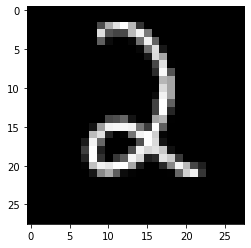

In [9]:
#Inspect the image
plt.imshow(X_test[47], cmap='gray')
plt.show()

## Test the Results

In [20]:
#Test on personal handwriting of a '6'
#Load and process image from directory
from PIL import Image, ImageOps
from numpy import asarray
digit = Image.open('secret_number.png')
digit = ImageOps.grayscale(digit)

secret_image = asarray(digit)
secret_digit = secret_image.reshape(1, img_rows, img_cols, 1)
print(secret_digit.shape)

(1, 28, 28, 1)


In [21]:
#Test on processed image
secret_pred = model.predict(secret_digit).argmax()
print(secret_pred)

6


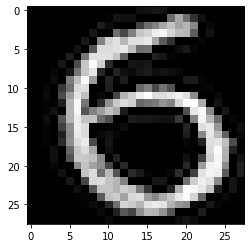

In [22]:
plt.imshow(secret_image, cmap='gray')
plt.show()

### Success!